Accuracy: 1.0


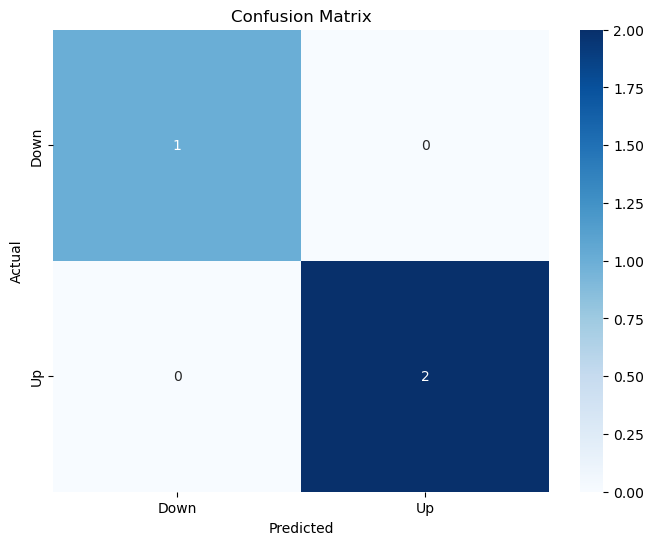

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import gradio as gr

# Step 1: Create the dataset
data = {
    'Age': ['Old', 'Old', 'Old', 'Mid', 'Mid', 'Mid', 'Mid', 'New', 'New', 'New'],
    'Competition': ['Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Type': ['S/W', 'S/W', 'H/W', 'S/W', 'H/W', 'H/W', 'S/W', 'S/W', 'H/W', 'S/W'],
    'Profit': ['Down', 'Down', 'Down', 'Down', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up']
}

df = pd.DataFrame(data)

# Step 2: Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 3: Split dataset into features (X) and target (y)
X = df[['Age', 'Competition', 'Type']]
y = df['Profit']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Step 7: Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Profit'].classes_,
            yticklabels=label_encoders['Profit'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Predicted salary category for position level 6.5: 4
Confusion Matrix:
[[1 0 0 0]
 [0 3 0 0]
 [0 0 1 0]
 [0 0 0 5]]


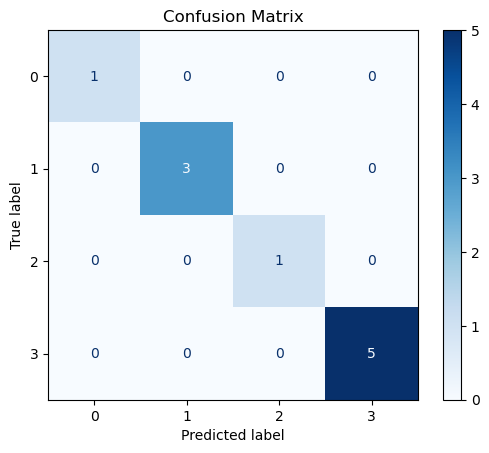

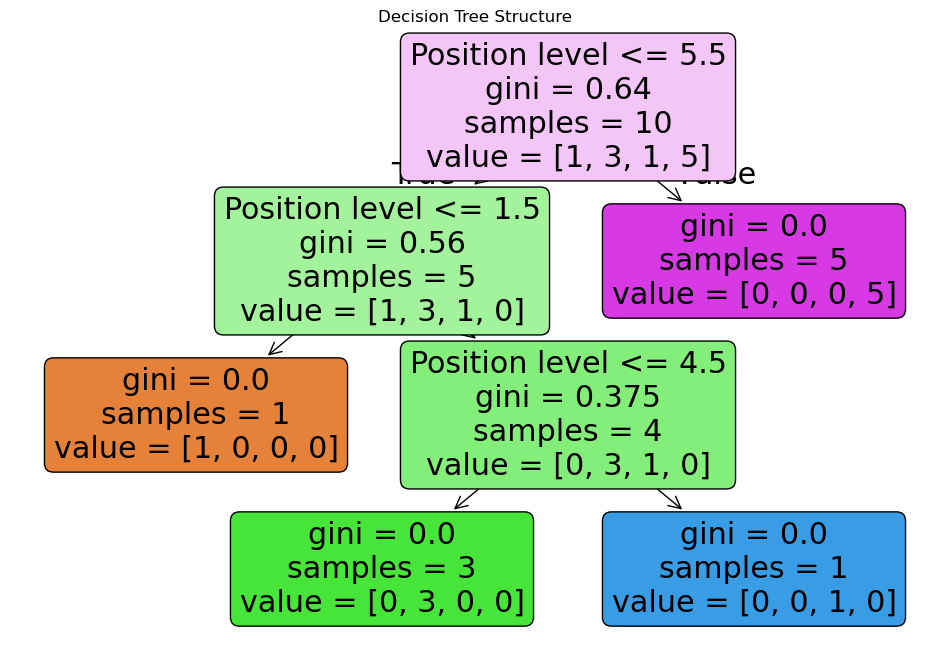

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Importing the dataset
dataset = pd.read_csv(r'D:\Machine learning\dataset\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Convert salaries to categories (for example, low, medium, high)
# Adjust the thresholds based on your dataset
thresholds = [0, 50000, 100000, 150000]
labels = [0, 1, 2]  # Categories: 0 = low, 1 = medium, 2 = high
y_categories = np.digitize(y, thresholds)

# Fitting Decision Tree Classifier to the dataset
classifier = DecisionTreeClassifier()
classifier.fit(X, y_categories)

# Predicting a new result
y_pred = classifier.predict(np.array([[6.5]]))  # Reshape the input to a 2D array
print(f'Predicted salary category for position level 6.5: {y_pred[0]}')

# Generating the confusion matrix
y_pred_all = classifier.predict(X)
cm = confusion_matrix(y_categories, y_pred_all)
print('Confusion Matrix:')
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=['Position level'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()


Predicted salary category for position level 6.5: 4
            Position  Level  Salary  Predicted Category
0   Business Analyst      1   45000                   1
1  Junior Consultant      2   50000                   2
2  Senior Consultant      3   60000                   2
3            Manager      4   80000                   2
4    Country Manager      5  110000                   3
Confusion Matrix:
[[1 0 0 0]
 [0 3 0 0]
 [0 0 1 0]
 [0 0 0 5]]


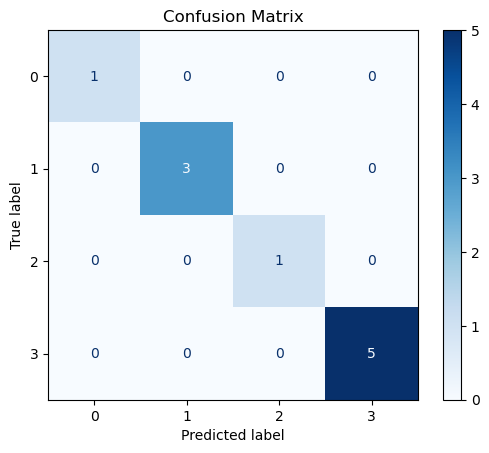

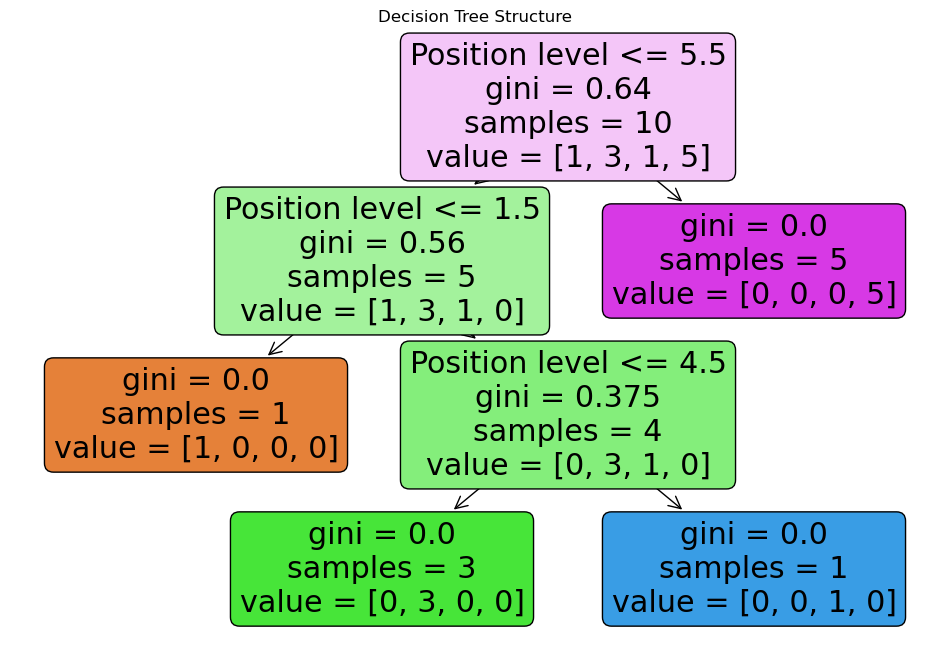

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Importing the dataset
dataset = pd.read_csv(r'D:\Machine learning\dataset\Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Convert salaries to categories (for example, low, medium, high)
# Adjust the thresholds based on your dataset
thresholds = [0, 50000, 100000, 150000]
labels = [0, 1, 2]  # Categories: 0 = low, 1 = medium, 2 = high
y_categories = np.digitize(y, thresholds)

# Fitting Decision Tree Classifier to the dataset
classifier = DecisionTreeClassifier()
classifier.fit(X, y_categories)

# Predicting a new result
y_pred = classifier.predict(np.array([[6.5]]))  # Reshape the input to a 2D array
print(f'Predicted salary category for position level 6.5: {y_pred[0]}')

# Generating predictions for all data
y_pred_all = classifier.predict(X)

# Adding predicted categories to the dataset
dataset['Predicted Category'] = y_pred_all

# Display the updated DataFrame
print(dataset.head())  # Show the first few rows of the updated dataset

# Generating the confusion matrix
cm = confusion_matrix(y_categories, y_pred_all)
print('Confusion Matrix:')
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=['Position level'], rounded=True)
plt.title('Decision Tree Structure')
plt.show()


In [4]:
dataset['Predicted Category'].value_counts()

Predicted Category
4    5
2    3
1    1
3    1
Name: count, dtype: int64